In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
%matplotlib inline

In [2]:
#import prijs bestand
df_fin = pd.read_excel('my_financials.xlsx',sheet_name='Sheet1', index_col=[0])
df_trans = pd.read_excel('my_transactions.xlsx', sheet_name='Sheet1',index_col=[0])

In [3]:
df_analysis = pd.merge(df_fin, df_trans, how='inner', on='ticker')
df_analysis

,ticker,open_price,growth_perc,gain_total,value_total,buy_price_x,shares_x,gain_ps,avg_buy,shares_y,buy_price_y,currency,buy_date,status,sector,region
0,VUSA.AS,56.203,2.35,1.293,56.203,54.91,1,1.293,54.91,1,54.91,EUR,2020-10-25,completed,all,NL
1,IAEX.AS,57.020,6.70,3.580,57.020,53.44,1,3.580,53.44,1,53.44,EUR,2020-11-02,completed,all,US


In [4]:
#add ticker breakdown
df_ticker_breakdown = pd.read_excel('ticker_breakdowns.xlsx', sheet_name='Sheet1', index_col=[0])
df_ticker_breakdown = df_ticker_breakdown.div(100)
df_ticker_breakdown_transposed = df_ticker_breakdown.transpose()
df_ticker_breakdown_transposed.reset_index(level=0, inplace=True)
df_ticker_breakdown_transposed.rename(columns={"index": "ticker"}, inplace=True)
df_ticker_breakdown_transposed

,ticker,Information Technology,Consumer Staples,Industrials,Energy,Consumer Discretionary,Health Care,Materials,Financials,Communication,Real Estate,Cash and/or Derivatives,Utilities
0,VUSA.AS,0.2810,0.1160,0.0830,0.0210,0.0700,0.1420,0.0260,0.0970,0.1080,0.0260,0.0000,0.03
1,IAEX.AS,0.2235,0.1947,0.1227,0.1159,0.0797,0.0782,0.0779,0.0769,0.0148,0.0122,0.0037,0.00


In [5]:
#strip df_fin
df_fin_minimum = df_fin[['ticker','open_price']]

In [6]:
#merge dataframes
df_sectors = pd.merge(df_ticker_breakdown_transposed, df_fin_minimum, how='inner', on='ticker')
df_sectors

,ticker,Information Technology,Consumer Staples,Industrials,Energy,Consumer Discretionary,Health Care,Materials,Financials,Communication,Real Estate,Cash and/or Derivatives,Utilities,open_price
0,VUSA.AS,0.2810,0.1160,0.0830,0.0210,0.0700,0.1420,0.0260,0.0970,0.1080,0.0260,0.0000,0.03,56.203
1,IAEX.AS,0.2235,0.1947,0.1227,0.1159,0.0797,0.0782,0.0779,0.0769,0.0148,0.0122,0.0037,0.00,57.020


In [7]:
#split columns into rows
df_sectors = df_sectors.melt(id_vars=["ticker", "open_price"], var_name="sector", value_name="exposure")

In [8]:
df_sectors['adj_openPrice'] = df_sectors['open_price'] * df_sectors['exposure']

In [9]:
df_sectors = df_sectors.groupby(['sector']).sum()
df_sectors.reset_index(level=0, inplace=True)
df_sectors.rename(columns={"index": "sector"}, inplace=True)
df_sectors

,sector,open_price,exposure,adj_openPrice
0,Cash and/or Derivatives,113.223,0.0037,0.210974
1,Communication,113.223,0.1228,6.913820
2,Consumer Discretionary,113.223,0.1497,8.478704
3,Consumer Staples,113.223,0.3107,17.621342
4,Energy,113.223,0.1369,7.788881
5,Financials,113.223,0.1739,9.836529
6,Health Care,113.223,0.2202,12.439790
7,Industrials,113.223,0.2057,11.661203
8,Information Technology,113.223,0.5045,28.537013
9,Materials,113.223,0.1039,5.903136


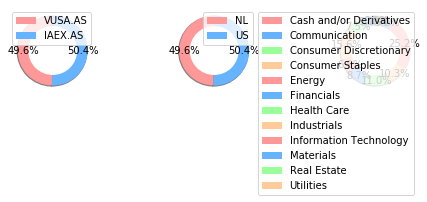

In [11]:
#variabelen
value = df_analysis['value_total'].tolist()
ticker_label = labels = df_analysis['ticker'].tolist()
region_label = df_analysis['region'].tolist()
sector_label = df_sectors['sector'].tolist()
sector_value = df_sectors['adj_openPrice'].tolist()
explode = (0, 0.05)
fig1, ax1 = plt.subplots()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

#first piechart
plt.subplot(1,3,1)
plt.pie(value, colors=colors,
        labels=None, 
        autopct= '%1.1f%%', 
        shadow=True, 
        startangle=90, 
        pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(loc='best', 
           labels=ticker_label)


#second piechart
plt.subplot(1,3,2)
plt.pie(value, 
        colors=colors,
        labels=None, 
        autopct= '%1.1f%%', 
        shadow=True, 
        startangle=90, 
        pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(loc='best',
           labels=region_label)



#second piechart
plt.subplot(1,3,3)
plt.pie(sector_value, 
        colors=colors,  
        labels=None, 
        autopct= '%1.1f%%', 
        shadow=True, 
        startangle=90, 
        pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(loc='best',
           labels=sector_label)

ax1.axis('equal')
plt.tight_layout()
